In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

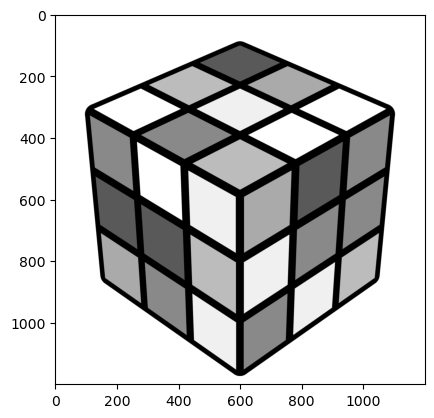

In [2]:
img = cv2.imread("./image/cube.png",0)
plt.imshow(img,cmap='grey')
plt.show()

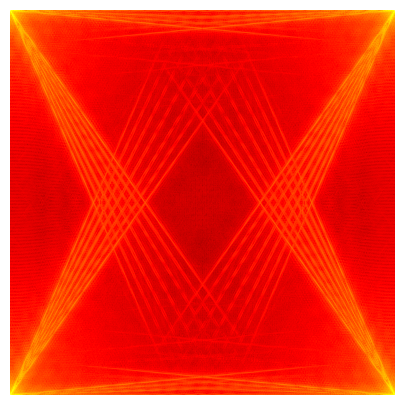

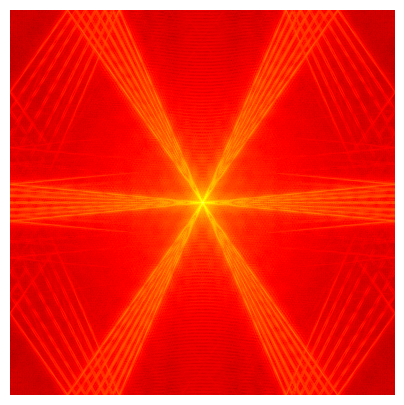

In [3]:
F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='hot')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='hot')
plt.axis('off')
plt.show()

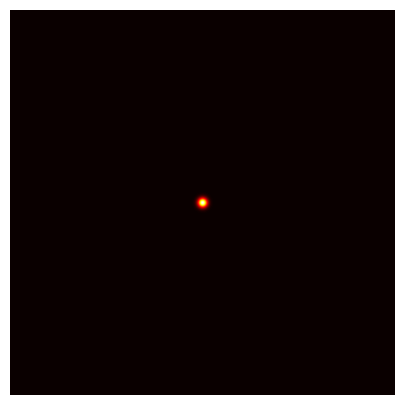

In [5]:
# Create Gaussin Filter: Low Pass Filter
D0 = 10
M,N = img.shape
H = np.zeros((M,N), dtype=np.float32)
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='hot')
plt.axis('off')
plt.show()

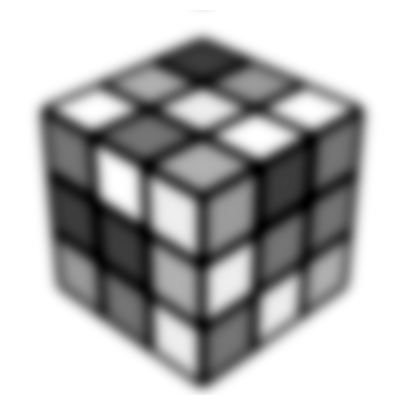

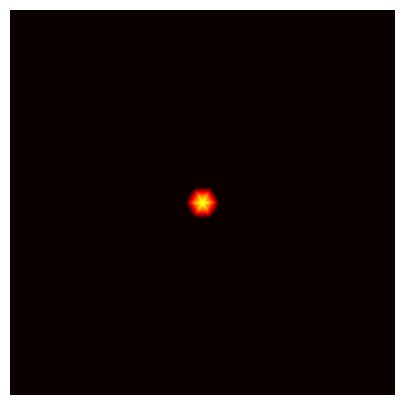

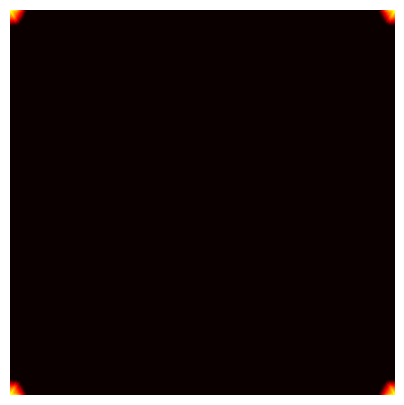

In [7]:
# Image Filters

Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='hot')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='hot')
plt.axis('off')
plt.show()

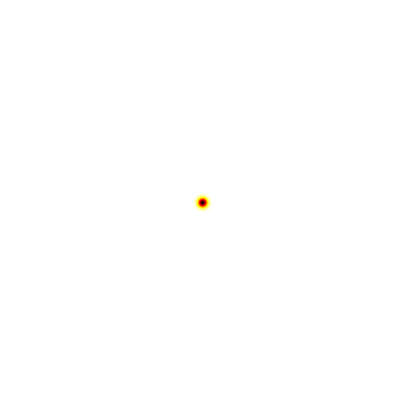

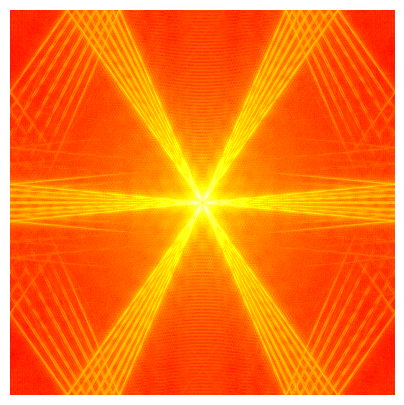

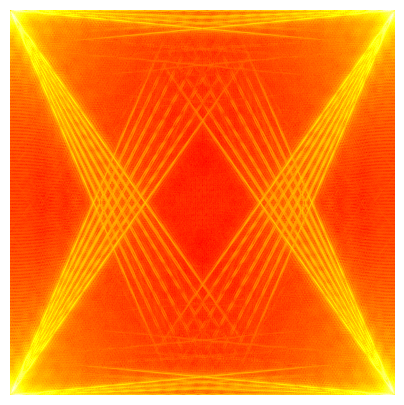

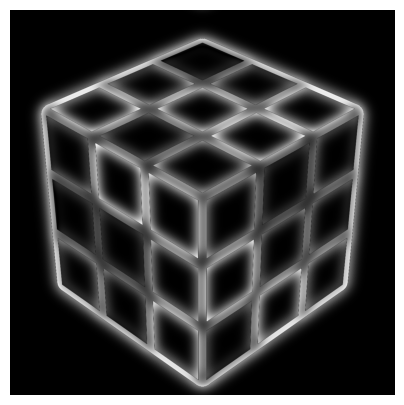

In [9]:
# Gaussian: High pass filter
HPF = 1 - H

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='hot')
plt.axis('off')
plt.show()

# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='hot')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='hot')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='grey')
plt.axis('off')
plt.show()
